In [9]:
import pandas as pd

In [10]:
transactions = pd.read_csv('KPMG_VI_Transactions.csv', header = 1)

In [40]:
transactions.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0
5,6,25,2339,3/8/2017,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,$829.65,39031.0
6,7,22,1542,4/21/2017,True,Approved,WeareA2B,Standard,medium,medium,60.34,$45.26,34165.0
7,8,15,2459,7/15/2017,False,Approved,WeareA2B,Standard,medium,medium,1292.84,$13.44,39915.0
8,9,67,1305,8/10/2017,False,Approved,Solex,Standard,medium,large,1071.23,$380.74,33455.0
9,10,12,3262,8/30/2017,True,Approved,WeareA2B,Standard,medium,medium,1231.15,$161.60,38216.0


In [42]:
# creating feature that is just a count of the transactions a customer has made
transactions['no_of_purchases'] = transactions.groupby('customer_id', sort = False)['transaction_id'].transform('count').values

In [111]:
# creating feature that is just the sum of money the customer has spent on our products
transactions['total_spent'] = transactions.groupby('customer_id', sort = False)['list_price'].transform('sum').values

In [112]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null object
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null object
product_first_sold_date    19803 non-null float64
no_of_purchases            20000 non-null int64
total_spent                20000 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 2.3+ MB


In [45]:
transactions.online_order.unique()

array([False, True, nan], dtype=object)

missing info on whether or not some orders were online

In [6]:
transactions[transactions['product_line'].isna() == True]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,9/23/2017,False,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,8/27/2017,False,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,3/10/2017,False,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,6/14/2017,True,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,7/2/2017,False,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,12/26/2017,True,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,6/11/2017,False,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,1/13/2017,False,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,6/24/2017,True,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


On nearly 200 orders were missing nearly all of the info about the product such as brand, class, size, etc.

In [46]:
transactions[transactions['product_line'].isna() == True]['product_id'].unique()

array([0], dtype=int64)

All of these transactions missing the product info have the same product_id of 0

In [8]:
transactions[transactions['product_id'] == 0]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
34,35,0,2171,8/20/2017,False,Approved,Norco Bicycles,Road,medium,medium,544.05,$376.84,38647.0
39,40,0,2448,11/28/2017,True,Approved,Norco Bicycles,Road,medium,medium,544.05,$376.84,38647.0
54,55,0,3140,9/18/2017,False,Approved,Norco Bicycles,Standard,low,medium,363.01,$290.41,38482.0
60,61,0,1839,2/24/2017,False,Approved,OHM Cycles,Road,high,large,12.01,$7.21,34244.0
63,64,0,2000,7/8/2017,False,Approved,Trek Bicycles,Standard,medium,medium,499.53,$388.72,39031.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19921,19922,0,1869,1/6/2017,True,Approved,Norco Bicycles,Road,medium,medium,543.39,$407.54,37698.0
19941,19942,0,966,7/30/2017,True,Approved,OHM Cycles,Standard,low,medium,71.16,$56.93,38647.0
19967,19968,0,2751,4/6/2017,False,Approved,WeareA2B,Standard,medium,medium,60.34,$45.26,34165.0
19987,19988,0,13,4/5/2017,True,Approved,Norco Bicycles,Road,medium,medium,544.05,$376.84,42105.0


product_id of 0 seems to be a bunch of different products

In [9]:
transactions['product_id'].value_counts()

0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64

In [47]:
transactions.transaction_date = pd.to_datetime(transactions.transaction_date)

In [48]:
transactions.sort_values(by = 'transaction_date')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,no_of_purchases
516,517,77,311,2017-01-01,True,Approved,WeareA2B,Standard,medium,medium,1769.64,$108.76,40672.0,6
5876,5877,67,138,2017-01-01,False,Approved,Norco Bicycles,Road,medium,medium,544.05,$376.84,38647.0,7
3459,3460,64,234,2017-01-01,True,Approved,Giant Bicycles,Standard,high,small,1977.36,"$1,759.85",40779.0,10
12484,12485,85,2805,2017-01-01,True,Approved,WeareA2B,Standard,medium,medium,1228.07,$400.91,36668.0,5
19130,19131,0,1707,2017-01-01,False,Approved,Trek Bicycles,Road,medium,medium,290.62,$215.14,38339.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,70,2878,2017-12-30,False,Approved,Trek Bicycles,Standard,high,medium,495.72,$297.43,36367.0,3
15269,15270,3,195,2017-12-30,False,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41167.0,7
19906,19907,41,1721,2017-12-30,False,Approved,Norco Bicycles,Standard,low,medium,958.74,$748.90,38693.0,7
15756,15757,30,3130,2017-12-30,False,Approved,Solex,Standard,high,medium,748.17,$448.90,33552.0,5


In [12]:
transactions.duplicated().any()

False

no duplicate rows which is good

In [13]:
transactions.describe()

,transaction_id,product_id,customer_id,list_price,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,1107.829449,38199.776549
std,5773.647028,30.75359,1011.951046,582.825242,2875.201110
min,1.000000,0.00000,1.000000,12.010000,33259.000000
25%,5000.750000,18.00000,857.750000,575.270000,35667.000000
50%,10000.500000,44.00000,1736.000000,1163.890000,38216.000000
75%,15000.250000,72.00000,2613.000000,1635.300000,40672.000000
max,20000.000000,100.00000,5034.000000,2091.470000,42710.000000


In [49]:
custdemo = pd.read_csv('KPMG_VI_CustomerDemographic.csv', header = 1)

In [50]:
custdemo.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0


In [51]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null object
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: float64(1), int64(2), object(10)
memory usage: 406.4+ KB


missing some info on customers like last names, DOB, job info

In [17]:
custdemo.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

some customers gender was not entered properly

In [18]:
len(custdemo.default.unique())

102

In [19]:
custdemo.default.sample(3)

1555              '"''''"
99      ð¾ ð ð ð ð ð ð ð§
1005                  NIL
Name: default, dtype: object

not sure what default is, but looks corrupt or like a mistake

In [52]:
custdemo.duplicated().any()

False

In [53]:
custdemo.DOB = pd.to_datetime(custdemo.DOB)

In [54]:
custdemo.sort_values(by = 'DOB')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3409,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
2412,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,NaN,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN


In [55]:
custdemo.DOB.describe()

count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

a customers date of birth is wrong

In [24]:
custdemo.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0


In [56]:
custdemo.DOB.mean()

Timestamp('1977-07-12 23:56:41.277792736')

The average customer is 43 years old (as of 2020)

In [57]:
custaddress = pd.read_csv('KPMG_VI_CustomerAddress.csv', header = 1)

In [58]:
custaddress.head(10)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
5,7,4 Delaware Trail,2210,New South Wales,Australia,9
6,8,49 Londonderry Lane,2650,New South Wales,Australia,4
7,9,97736 7th Trail,2023,New South Wales,Australia,12
8,11,93405 Ludington Park,3044,VIC,Australia,8
9,12,44339 Golden Leaf Alley,4557,QLD,Australia,4


In [59]:
custaddress.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

some entries for states New South Wales and Victoria were not entered properly

In [60]:
custaddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [61]:
custaddress.duplicated().any()

False

In [62]:
custaddress.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [63]:
custaddress.groupby('state').mean()

,customer_id,postcode,property_valuation
state,,,
NSW,2054.647030,2316.451315,8.362707
New South Wales,76.616279,2269.453488,9.081395
QLD,2000.192124,4331.106205,5.569212
VIC,2196.646432,3289.366347,7.237487
Victoria,589.048780,3276.731707,7.670732


pretty clear gap in mean property_valuation across the states

In [113]:
# combining all three dataframes into one on 'customer_id'
allinfo = transactions.merge(custdemo,on='customer_id').merge(custaddress,on='customer_id')

In [114]:
allinfo.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,False,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
5,9155,91,3120,2017-10-30,True,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
6,11409,95,3120,2017-01-30,False,Approved,Giant Bicycles,Standard,medium,large,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
7,13066,38,3120,2017-01-20,True,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
8,15829,41,3120,2017-12-10,False,Approved,Solex,Road,medium,medium,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
9,18612,10,3120,2017-10-24,False,Approved,WeareA2B,Touring,medium,medium,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5


In [115]:
allinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 32 columns):
transaction_id                         19968 non-null int64
product_id                             19968 non-null int64
customer_id                            19968 non-null int64
transaction_date                       19968 non-null datetime64[ns]
online_order                           19609 non-null object
order_status                           19968 non-null object
brand                                  19773 non-null object
product_line                           19773 non-null object
product_class                          19773 non-null object
product_size                           19773 non-null object
list_price                             19968 non-null float64
standard_cost                          19773 non-null object
product_first_sold_date                19773 non-null float64
no_of_purchases                        19968 non-null int64
total_spent                    

In [67]:
allinfo.brand.value_counts()

Solex             4248
Giant Bicycles    3308
WeareA2B          3290
OHM Cycles        3039
Trek Bicycles     2983
Norco Bicycles    2905
Name: brand, dtype: int64

Solex is the top selling brand by decent margin

In [68]:
allinfo.job_industry_category.value_counts()

Manufacturing         4014
Financial Services    3880
Health                3099
Retail                1758
Property              1289
IT                    1076
Entertainment          698
Argiculture            578
Telecommunications     354
Name: job_industry_category, dtype: int64

In [69]:
allinfo.state.value_counts()

NSW                10200
VIC                 4541
QLD                 4262
New South Wales      485
Victoria             480
Name: state, dtype: int64

NSW by far has the most customers

In [ ]:
allinfo.plot()

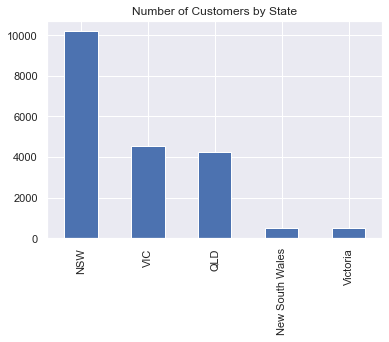

In [263]:
allinfo.state.value_counts().plot(kind='bar', title = 'Number of Customers by State')
plt.show()

In [70]:
allinfo.gender.value_counts()

Female    9979
Male      9510
U          455
F           11
Femal        7
M            6
Name: gender, dtype: int64

In [71]:
allinfo.wealth_segment.value_counts()

Mass Customer        10029
High Net Worth        5081
Affluent Customer     4858
Name: wealth_segment, dtype: int64

The average customer seems to be around 43 years old from NSW, is any gender, and is a mass customer

In [225]:
# looking at the top 200 customers who've spent the most money

topcustomers = allinfo[allinfo.customer_id.isin(allinfo.groupby('customer_id') \
                                 .mean().sort_values('total_spent', ascending = False).reset_index()['customer_id'][:200])]

In [254]:
topcustomers.state.value_counts()

NSW                1083
VIC                 469
QLD                 404
Victoria             29
New South Wales      19
Name: state, dtype: int64

In [255]:
topcustomers.gender.value_counts()

Female    1020
Male       924
U           60
Name: gender, dtype: int64

In [256]:
topcustomers.brand.value_counts()

Solex             413
Giant Bicycles    361
WeareA2B          341
Trek Bicycles     340
OHM Cycles        265
Norco Bicycles    257
Name: brand, dtype: int64

In [257]:
topcustomers.wealth_segment.value_counts()

Mass Customer        961
High Net Worth       529
Affluent Customer    514
Name: wealth_segment, dtype: int64

In [258]:
topcustomers.job_industry_category.value_counts()

Health                423
Financial Services    399
Manufacturing         360
Retail                168
IT                    134
Property               94
Entertainment          68
Argiculture            35
Telecommunications     10
Name: job_industry_category, dtype: int64

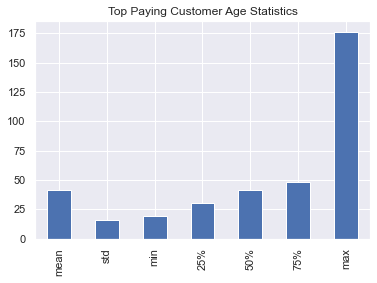

In [279]:
topcustomers.describe()['Age'].drop('count').plot(kind='bar',title = 'Top Paying Customer Age Statistics')
plt.show()

In [280]:
topcustomers.describe()

,transaction_id,product_id,customer_id,list_price,product_first_sold_date,no_of_purchases,total_spent,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Age
count,2004.000000,2004.000000,2004.000000,2004.000000,1977.000000,2004.000000,2004.000000,2004.000000,1953.000000,2004.000000,2004.000000,1953.000000
mean,10058.809880,45.127745,1759.285429,1306.679990,38317.743551,10.272455,13210.342989,49.089321,10.189452,2956.580339,7.665170,41.399367
std,5794.145021,30.033974,1021.002963,559.051926,2849.355485,1.608955,1520.391300,28.660241,5.807530,828.901008,2.682977,15.515208
min,8.000000,0.000000,8.000000,12.010000,33259.000000,6.000000,11444.000000,0.000000,1.000000,2007.000000,1.000000,19.638356
25%,4937.750000,18.000000,853.000000,945.040000,36145.000000,9.000000,12024.760000,27.000000,5.000000,2196.000000,6.000000,30.835616
50%,10176.000000,44.000000,1696.000000,1386.840000,38339.000000,10.000000,12778.905000,49.000000,11.000000,2763.000000,8.000000,41.824658
75%,15072.250000,71.000000,2684.000000,1793.430000,40779.000000,11.000000,14078.190000,74.000000,14.000000,3677.000000,10.000000,48.583562
max,19954.000000,100.000000,3482.000000,2091.470000,42710.000000,14.000000,19071.320000,99.000000,22.000000,4860.000000,12.000000,176.589041


In [117]:
#import necessary packages

import pandas as pd
import numpy as np
import category_encoders as ce
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_auc_score, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [119]:
from datetime import date

In [120]:
allinfo['today'] = date.today()

In [121]:
allinfo['today'] = pd.to_datetime(allinfo['today'])

In [122]:
# creating an age feature
allinfo['Age'] = (allinfo.today - allinfo.DOB).dt.days/365

In [123]:
allinfo.drop('today', axis = 1, inplace = True)

In [124]:
allinfo.drop('DOB', axis = 1, inplace = True)

In [177]:
# I made this the target because it made the most sense with the data given
target = 'total_spent'
used_cols = [c for c in allinfo.columns.tolist() if c not in [target, 'address', 'default','first_name',
                                                              'transaction_id', 'product_id', 'customer_id',
                                                              'transaction_date','online_order','order_status',
                                                              'brand','product_line','product_class','product_size',
                                                              'list_price','standard_cost','product_first_sold_date',
                                                              'last_name', 'no_of_purchases', 'total_spent']]

X, y = allinfo[used_cols], allinfo[target]

In [178]:
cate = ['gender','job_title','job_industry_category','wealth_segment',
        'deceased_indicator','owns_car','postcode','state','country']

In [179]:
# target encoding categorical features
ce_target_encoder = ce.TargetEncoder(cols = cate, smoothing=.3)
ce_target_encoder.fit(X, y)

TargetEncoder(cols=['gender', 'job_title', 'job_industry_category',
                    'wealth_segment', 'deceased_indicator', 'owns_car',
                    'postcode', 'state', 'country'],
              smoothing=0.3)

In [180]:
X = ce_target_encoder.transform(X)

[01:14:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


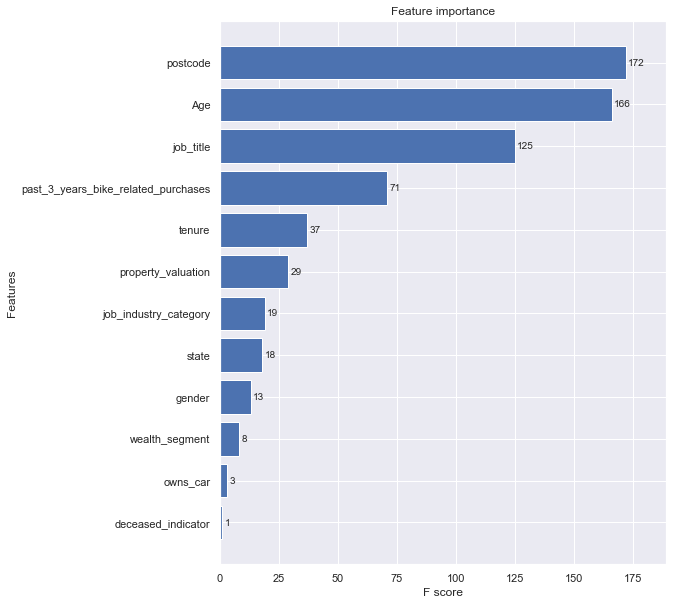

In [187]:
clf = xgb.XGBRegressor(n_jobs = -1)
clf.fit(X, y.values)
# plot the important features #
fig, ax = plt.subplots(figsize=(8,10))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

These are the what the model found to be the most important features when trying to predict the total amount of money a customer spent at the store. I only used these features, because they are available in the NewCustomerList dataset, so this model could be applied to new customers.

In [188]:
scores = cross_val_score(clf, X.values, y.values, cv=5, scoring='r2')
print(scores.mean(), "+/-", scores.std())

[01:14:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:14:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.2004892397356381 +/- 0.12906063187135303


The model isn't very accurate, as this is a tough target to predict and there isn't very much training data.

[02:05:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


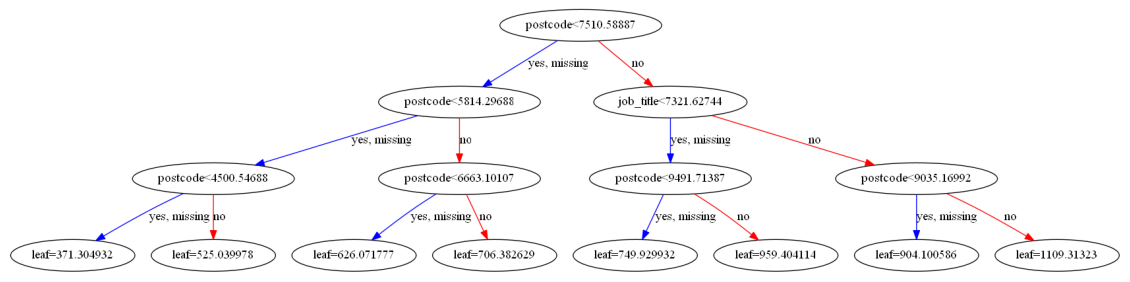

In [271]:
fig, ax = plt.subplots(figsize=(20, 15))
xgb.plot_tree(clf.fit(X, y.values), ax=ax)
plt.show()